#### DataCamp

#### Time Series Analysis in Python -- Rob Reider

Time series methods usually study longitudinal data, measured over a length of time.  
Data which captures a snapshot in time is cross-sectional data.


In [5]:
# Some pandas tools we'll rely on

# df.index = pd.to_datetime(df.index) # to convert the index from string to datetime
# df.plot # to plot and if index is datetime object, can slice by time period
# df1.join(df2) # to merge or join
# df.resample() # e.g., to convert daily data to weekly
# df['col'].pct_change() # to calculate % change e.g., to convert prices to returns, has NaN in the first row
# df['col'].diff() # to calculate differences
# plt.scatter(df['col1'], df['col2']) # to draw a scatterplot
# df['col1'].corr(df['col2']) # to find the correlation of two series
# df['col1'].autocorr()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Google Trends](https://trends.google.com/trends/) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called `diet`. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

In [6]:

# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.title('Google search trends of \'diet\' over time')
plt.show()

# Slice the dataset to keep only 2012
diet2012 = diet['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.title('Google search trends of \'diet\' in 2012')
plt.show()

NameError: name 'diet' is not defined

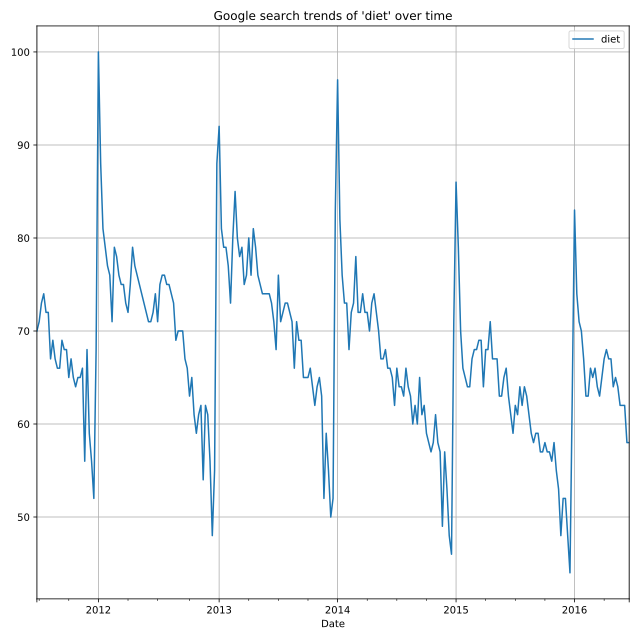

In [14]:
from IPython.core.display import SVG
SVG(filename='pics/pic01.svg')

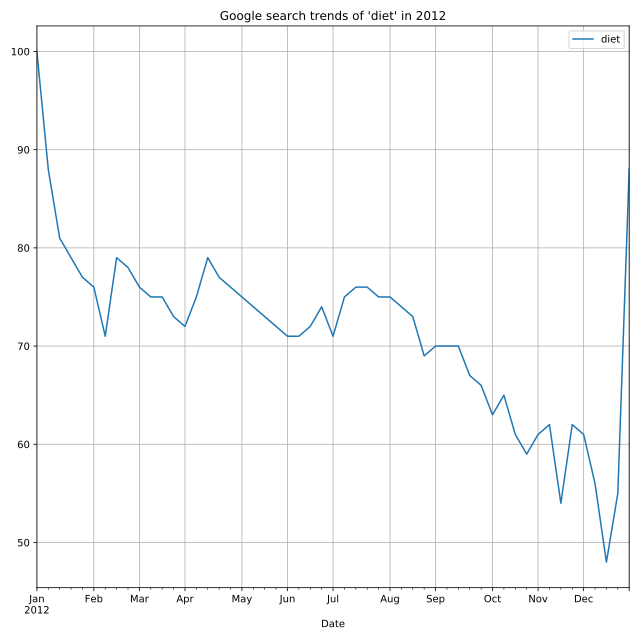

In [13]:
from IPython.core.display import SVG
SVG(filename='pics/pic02.svg')

Notice how searches for 'diet' spiked up after the holidays every year.

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas `.join()` method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from [FRED](https://fred.stlouisfed.org/), are pre-loaded in DataFrames `stocks` and `bonds`.

In [ ]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds)

    output:
    {'2008-11-11', '2013-10-14', '2007-10-08', '2015-10-12', '2012-10-08', '2007-11-12', '2009-11-11', '2015-11-11', '2010-10-11', '2016-11-11', '2011-10-10', '2014-10-13', '2016-10-10', '2009-10-12', '2017-06-09', '2011-11-11', '2010-11-11', '2008-10-13', '2014-11-11', '2013-11-11', '2012-11-12'}

Two trending stocks will tend to have high correlation. That is why it is important to look at the correlation of their **returns** and not their **levels**.

E.g., Correlation coeffecient between DJIA and Number of UFO sightings is 0.94 but the correlation between their percentage changes is close to 0.

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called stocks_and_bonds under columns `SP500` and `US10Y`.

In [ ]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y'])
plt.xlabel('S & P 500')
plt.ylabel('US 10-year Bond Yields')
plt.show()

    output:
    Correlation of stocks and interest rates:  0.4119448886249272

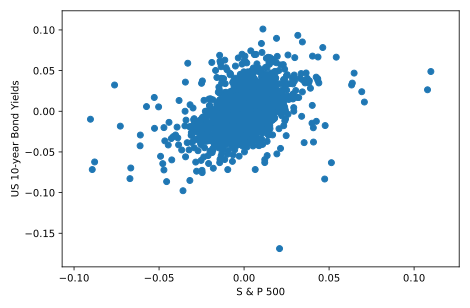

In [12]:
from IPython.core.display import SVG
SVG(filename='pics/pic03.svg')

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

The DataFrame `levels` contains the levels of `DJI` and `UFO`. UFO data was downloaded from www.nuforc.org.

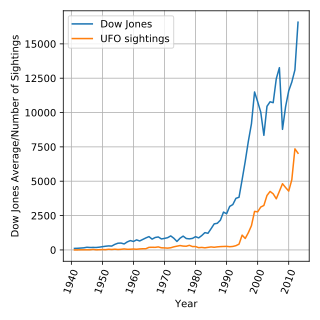

In [15]:
from IPython.core.display import SVG
SVG(filename='pics/pic04.svg')

In [ ]:
# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

    output:
    Correlation of levels:  0.9399762210726432
    Correlation of changes:  0.06026935462405376

#### Different regression models

In `statsmodels`:

    import statsmodels.api as sm
    sm.OLS(y, x).fit()
    
In `numpy`:

    import numpy as np
    np.polyfit(x, y, deg=1)
    
In `pandas`:

    import pandas as pd
    pd.ols(y, x)
    
In `scipy`:

    from scipy import stats
    stats.linregress(x, y)

WE'll use `statsmodels` for our linear regressions. If there is no column of constants, it assumes that we want to build our linear model with no intercept term. Hence, we'll need to add a column of 1's explicitly using:

`df = sm.add_constant(df)`

In [17]:
import statsmodels.api as sm

results = sm.OLS(df['col1'], df[['const', 'col2']]).fit() # results are saved in a class instance results
print(results.summary())

print(results.param[0], results.param[1]) # returns the intercept and slope

NameError: name 'df' is not defined

#### R^2 = corr^2

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package `statsmodels`, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, `x` and `y`, compute their correlation, and then regress `y` on `x` using the function `OLS(y,x)` in the `statsmodels.api` library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the α in the regression *y_t = α + βx_t + ϵ_t)*. To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.

In [ ]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

    output:
    The correlation between x and y is -0.90
                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                      y   R-squared:                       0.818
    Model:                            OLS   Adj. R-squared:                  0.817
    Method:                 Least Squares   F-statistic:                     4471.
    Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
    Time:                        23:02:03   Log-Likelihood:                -560.10
    No. Observations:                1000   AIC:                             1124.
    Df Residuals:                     998   BIC:                             1134.
    Df Model:                           1                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    const         -0.0052      0.013     -0.391      0.696      -0.032       0.021
    x             -0.9080      0.014    -66.869      0.000      -0.935      -0.881
    ==============================================================================
    Omnibus:                        0.048   Durbin-Watson:                   2.066
    Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.103
    Skew:                          -0.003   Prob(JB):                        0.950
    Kurtosis:                       2.951   Cond. No.                         1.03
    ==============================================================================
    
    Warnings:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

#### Autocorrelation or serial correlation

Correlation of a time series with a lagged copy of itself. Often, we are referring to the lag-one autocorrelation.

For financial time series, if returns have a negative autocorrelation, we say it is **mean reverting**.
Alternatively, if returns have a positive autocorrelation, we say it is **trend following** (or momentum).

Historically, stocks have had negative autocorrelation over horizons of about one week. And commodities and currencies have had positive autocorrelation over horizons of several months.

In [ ]:
# Calculate monthly autocorrelation for the daily Japanese Yen/USD exchange rate, stored in df

df.index = pd.to_datetime(df.index)
df = df.resample(rule='M', how='last') # first/last/average
df['Return'] = df['Price'].pct_change()
autocorrelation = df['Return'].autocorr()
print("The autocorrelation is: ", autocorrelation)

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as *mean reversion* in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see [here](https://www.quantopian.com/posts/enhancing-short-term-mean-reversion-strategies-1).

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame `MSFT` of daily prices. You should use the `.resample()` method to get weekly prices and then compute returns from prices. Use the pandas method `.autocorr()` to get the autocorrelation and show that the autocorrelation is negative. Note that the `.autocorr()` method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

In [4]:
MSFT = pd.read_csv('data/MSFT.csv', parse_dates=['Date'], index_col='Date')

# Convert the daily data to weekly data
#MSFT = MSFT.resample(rule='W', how='last') # deprecated
MSFT = MSFT.resample('W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()
returns = returns.dropna()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame `daily_rates` contains daily data of 10-year interest rates from 1962 to 2017.

In [ ]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample('A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

    output:
    The autocorrelation of daily interest rate changes is 0.07
    The autocorrelation of annual interest rate changes is -0.22

Notice how the daily autocorrelation is small but the annual autocorrelation is large and negative.

The autocorrelation function (ACF) shows not only the lag-one autocorrelation but the entire autocorrelation function for different lags. Any significant non-zero autocorrelation implies that the series can be forecast from the past.

Hence, ACF is useful for selecting a parsimonious model for fitting the data.

In [ ]:
# To plot ACF
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(x, lags=number_of_lags, alpha=0.05)
# alpha = width of confidence interval for each lag
# alpha = 1 for no confidence interval

# alpha = 0.05 implies that there is only a 5% chance if true autocorrelation is zero,
# it will fall outside the blue band.

# Confidence intervals get wider if:
# 1. alpha is lower.
# 2. We have fewer observations.

# An approximation to the 95% CI is [ +2/sqrt(N), -2/sqrt(N)] # where N = # of samples.

# To just get numerical values of ACF
from statsmodels.tsa.stattools import acf
print(acf(x))

In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted below, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings that is loaded in the DataFrame `HRB`. Then, plot the autocorrelation function using the `plot_acf` module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at `lag=0` is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting `alpha=1`.

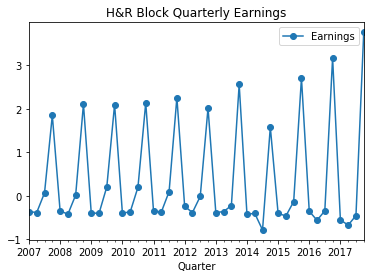

In [22]:
HRB = pd.read_csv('data/HRB.csv', parse_dates=['Quarter'], index_col='Quarter')

HRB.plot(marker='o')
plt.title('H&R Block Quarterly Earnings')
plt.show()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


/home/shuvra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


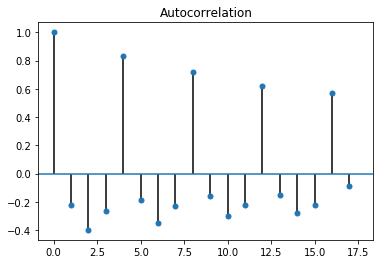

In [46]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is 1/√N where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is ±1.96/√N. This approximation only holds when the true autocorrelations are all zero.

You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter. The weekly returns of Microsoft is pre-loaded in a DataFrame called `returns`.

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


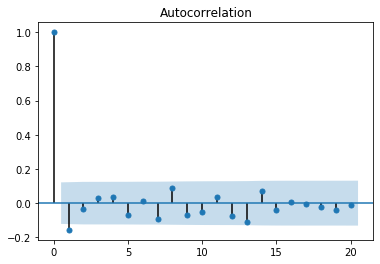

In [45]:
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, lags=20, alpha=.05)
plt.show()

Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero.

White Noise is a series with constant mean, constant variance and zero autocorrelation at all lags.  
If, in addition, the data has a normal distribution, then it's a Gaussian white noise.

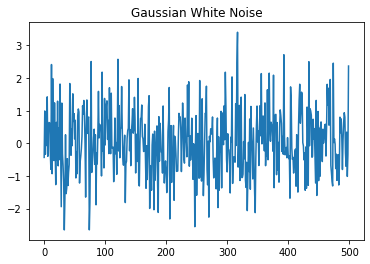

In [48]:
# Simulating white noise
noise = np.random.normal(loc=0, scale=1, size=500)
# loc=mean, scale=std dev
plt.plot(noise)
plt.title('Gaussian White Noise')
plt.show()

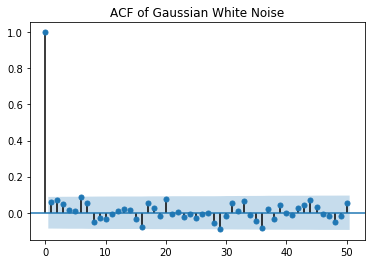

In [51]:
plot_acf(noise, lags=50, alpha=0.05)
plt.title('ACF of Gaussian White Noise')
plt.show()

Returns of stock market, e.g., S&P 500 are pretty close to a white noise process.

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use `np.random.normal()` to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

The mean is 0.019 and the standard deviation is 0.049


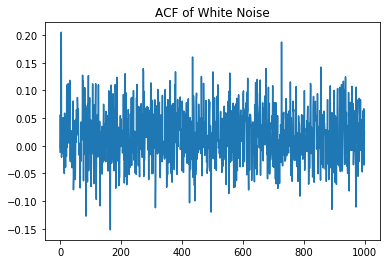

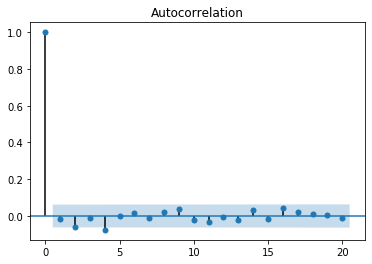

In [52]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=.02, scale=.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.title('ACF of White Noise')
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

#### Random Walk

P_t = P_{t-1} + \epsilon_t, where \epsilon_t is some noise

So, change in P = P_t - P_{t-1} = \epsilon_t is white noise.

So, if the prices were logs, then the difference in log prices would be one way to measure returns. Thus, if stock *prices* follow a random walk, then stock *returns* are white noise.

You can't forecast a random walk; the best guess for P_t is P_{t-1}.

#### Random Walk with drift

P_t = \mu + P_{t-1} + \epsilon_t

P_t - P_{t-1} = \mu + \epsilon_t is still white noise with a mean of \mu.

So, if we consider stock prices as random walk with drift, the returns are still white noise but with an average return of \mu instead of 0.

To test whether a series like stock prices follows a random walk, we can regress current prices on the lag price as follows:
P_t = \alpha + \beta P_{t-1} + \epsilon_t.

If the slope coeffecient \beta is not significantly different from 1, then we cannot reject the null hypothesis that the stock prices follow a random walk. However, if the slope coeffecient \beta is significantly less than 1, then we can reject the null hypothesis that the stock prices follow a random walk. (Why less than 1 and not more than 1???)

An identical way to do that test is to regress the difference in prices on the lag price
P_t - P_{t-1} = \alpha + \beta P_{t-1} + \epsilon_t.

H_0 (Null Hypothesis): \beta = 0 (random walk), H_a (Alternate Hypothesis): \beta < 0 (not a random walk)

Now, instead of testing whether the slope coeffecient \beta is 1, we see whether it is 0. This is called the Dickey-Fuller Test. If we add more lag prices on the right, it is called the Augmented Dickey-Fuller Test.

`statsmodels` has a function `adfuller` to run the Augmented Dickey-Fuller Test.

In [7]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(MSFT['Adj Close'])

In [9]:
# Print the p-value

print(results[1])

0.9856892582563027


In [10]:
# Print the full results

print(results)

(0.5276344885718537, 0.9856892582563027, 1, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 832.0857227547677)


If the p-value is less than .05, we can reject the null hypothesis that the series is a random walk with 95% confidence. In this case, we cannot reject the null hypothesis.

`results[0]`: test statistic  
`results[1]`: p-value  
`results[3]`: # of observations  
`results[4]`: critical values of test statistic for various \alphas viz., .01, .05, .1

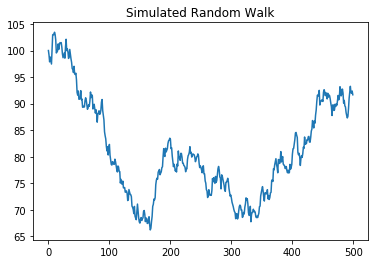

In [11]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

- You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
- In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

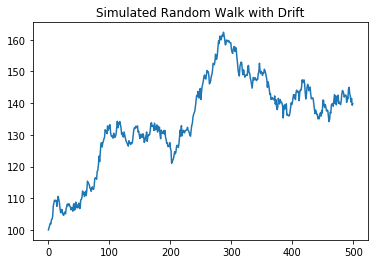

In [12]:
# Generate 500 random steps
steps = np.random.normal(loc=.001, scale=.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

This simulated price series you plotted should closely resemble a random walk for a high flying stock.

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, loaded in the DataFrame `AMZN`, and run the 'Augmented Dickey-Fuller Test' from the `statsmodels` library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [14]:
AMZN = pd.read_csv('data/AMZN.csv', parse_dates=['Date'], index_col='Date')
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [16]:
# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770742, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. In the next exercise, you'll look at Amazon returns.

In the last exercise, you showed that Amazon stock prices, contained in the DataFrame `AMZN` follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [17]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808344604e-22


The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

#### Stationarity: The joint distribution of the observations/data is time-invariant.

Less restrictive and easier to test version of stationarity:
Weak stationarity: mean, variance and autocorrelation are time-invariant, i.e., for autocorrelation, corr(X_t, X_{t-\tau}) is only a function of \tau and not a function of time t.

A non-stationary process is difficult to model. Modelling involves estimating a set of parameters and if a process is not stationary, and the parameters are different at each point of time, then there are too many parameters to estimate. We might end up with more parameters than actual data.

Hence, stationarity is necessary for a parsimonious model.

Random walk is a common type of non-stationary series as variance grows with time. Stock prices (modelled by a random walk) ten years from today are a lot more uncertain than stock prices tomorrow.

Seasonal series are also not stationary as the mean varies with the time of the year.

White noise is ordinarily a stationary process but if it's trending upwards, then the mean increases with time which makes it non-stationary.

Many non-stationary series can be made stationary through a simple transformation. By taking first differences, a random walk becomes white noise, which is stationary.

Text(0.5, 1.0, 'MSFT stock prices')

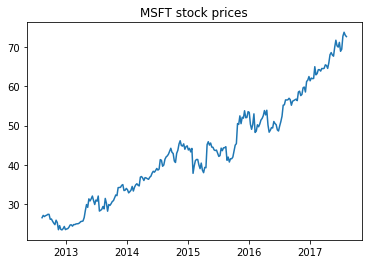

In [33]:
plt.plot(MSFT['Adj Close']) # MSFT prices which were a non-stationary random walk
plt.title('MSFT stock prices')

Text(0.5, 1.0, 'MSFT stock price differences')

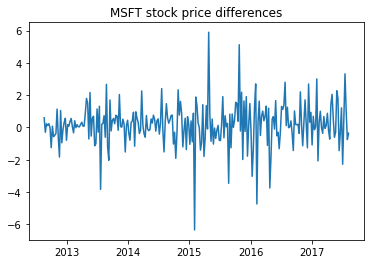

In [34]:
plt.plot(MSFT['Adj Close'].diff()) # MSFT price differences which us a stationary white noise process
plt.title('MSFT stock price differences')

Text(0.5, 1.0, 'H&R Block quarterly earnings')

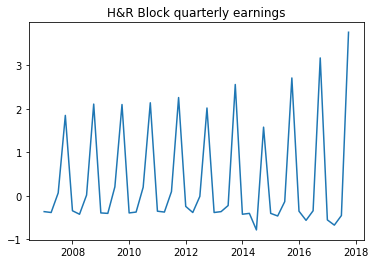

In [32]:
plt.plot(HRB) # quarterly earnings of H&R Block which has a large seasonal component, hence non-stationary
plt.title('H&R Block quarterly earnings')

Text(0.5, 1.0, 'H&R Block quarterly earnings difference')

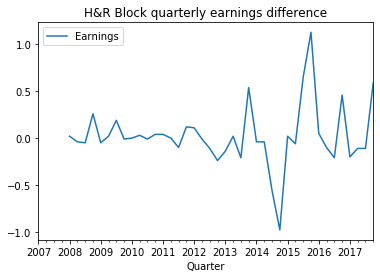

In [35]:
HRB.diff(4).plot() # seasonal difference looks stationary
#plt.plot(HRB.diff(4))
plt.title('H&R Block quarterly earnings difference')

Sometimes, more than one transformation is necessary to make it stationary.

E.g., for Amazon's quarterly revenue grows exponentially and shows a strong seasonal pattern as well. First, we take log of the series to get rid of the exponential growth. If we take log and also take a seasonal difference, we get stationary white noise.

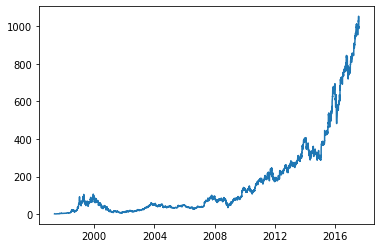

In [40]:
plt.plot(AMZN)

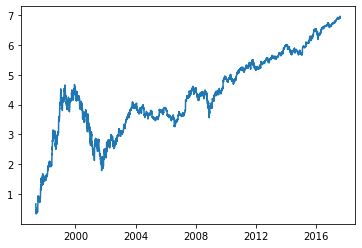

In [41]:
plt.plot(np.log(AMZN))

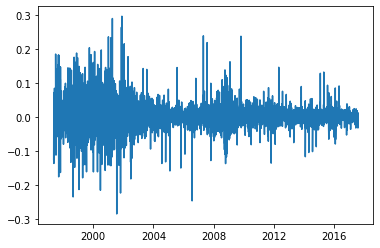

In [45]:
plt.plot(np.log(AMZN).diff())

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame `HRB`, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

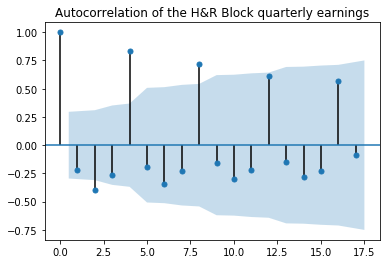

            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


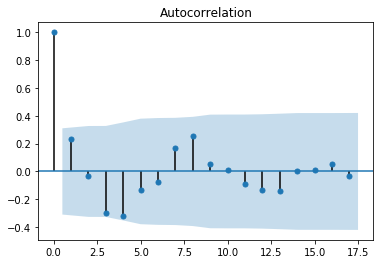

In [51]:
plot_acf(HRB, alpha=.05)
plt.title('Autocorrelation of the H&R Block quarterly earnings')
plt.show()

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function.

#### Autoregressive (AR) model

P_t = \mu + \phi P_{t-1} + \epsilon_t
The above is an AR(1) model, an AR model of order 1.

\phi is called the AR parameter.
- If \phi = 1, then the process is a random walk.
- If \phi = 0, then the process is white noise.
- For the process to be stable and stationary, -1 < \phi < 1 must hold.

For example, if R_t is a time series of stock returns.
R_t = \mu + \phi R_{t-1} + \epsilon_t

- If \phi < 0, then it is mean reverting.
- If \phi > 0, then it is momentum.

Autocorrelation decays exponentially at the rate of \phi. Lag-one autocorrelation is \phi, Lag-two autocorrelation is \phi^2, etc.

P_t = \mu + \phi_1 P_{t-1} + \phi_2 P_{t-2} + \epsilon_t  
The above is an AR(2) model.

P_t = \mu + \phi_1 P_{t-1} + \phi_2 P_{t-2} + \phi_3 P_{t-3} + \epsilon_t  
The above is an AR(3) model.

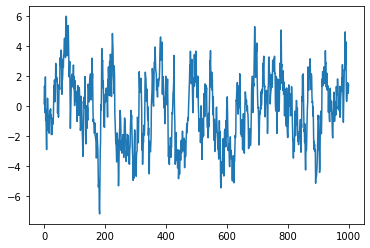

In [52]:
# Simulating an AR process

# Notation consistent with time series literature in signal processing

from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9]) # \phi_0=1, -\phi_1
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

You will simulate and plot a few AR(1) time series, each with a different parameter, ϕ, using the `arima_process` module in `statsmodels`. In this exercise, you will look at an AR(1) model with a large positive ϕ and a large negative ϕ, but feel free to play around with your own parameters.

There are a few conventions when using the `arima_process` module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with ϕ=0.9, the array representing the AR parameters would be `ar = np.array([1, -0.9])`.

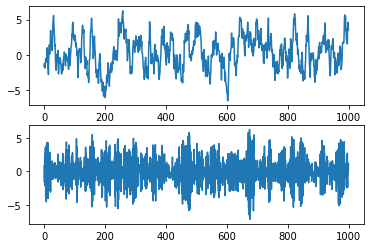

In [53]:
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, .9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

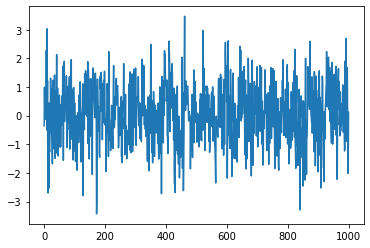

In [55]:
# Plot 3: AR parameter = .3
ar3 = [1, -.3]
ma3 = [1]
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, ϕ=+0.9, the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)^2=0.81, the third-lag will be (0.9)^3=0.729, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (−0.9)^2=0.81, the third-lag will be (−0.9)^3=−0.729, etc.

The object `simulated_data_1` is the simulated time series with an AR parameter of +0.9, `simulated_data_2` is for an AR parameter of -0.9, and `simulated_data_3` is for an AR parameter of 0.3.

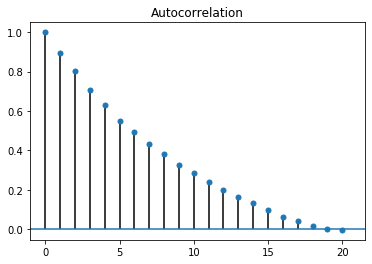

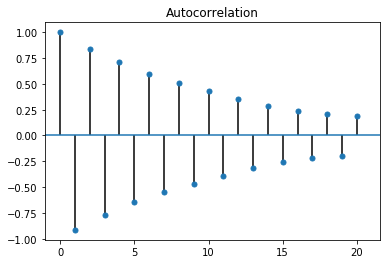

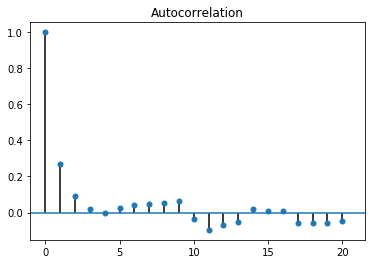

In [56]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3s
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

In [57]:
# Estimating an AR model

from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()

In [59]:
print(result.summary()) # Recall: true \mu = 0 and \phi = .9

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1439.028
Method:                       css-mle   S.D. of innovations              1.019
Date:                Sat, 31 Oct 2020   AIC                           2884.056
Time:                        01:19:03   BIC                           2898.780
Sample:                             0   HQIC                          2889.652
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2058      0.290     -0.709      0.479      -0.775       0.363
ar.L1.y        0.8899      0.014     62.097      0.000       0.862       0.918
                                    Roots           

In [58]:
print(result.summary2()) #????

                           Results: ARMA
Model:              ARMA             BIC:                 2898.7795
Dependent Variable: y                Log-Likelihood:      -1439.0  
Date:               2020-10-31 01:18 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           2                Sample:              0        
Df Residuals:       998                                   0        
Converged:          1.0000           S.D. of innovations: 1.019    
No. Iterations:     5.0000           HQIC:                2889.652 
AIC:                2884.0563                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const        -0.2058     0.2904   -0.7088   0.4786   -0.7750   0.3633
ar.L1.y       0.8899     0.0143   62.0972   0.0000    0.8618   0.91

In [60]:
print(result.params) # returns just \mu and \phi

[-0.20583551  0.88986789]


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

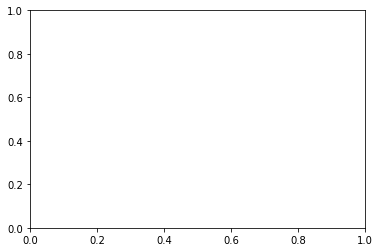

In [61]:
# Forecasting an AR model

# Obtain result as above

result.plot_predict(start='2016-07-01', end='2017-06-01') # if the index is a date
# The plot also gives CI around the out-of-sample forecasts
plt.show()

You will estimate the AR(1) parameter, ϕ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For `simulated_data_1` with a true ϕ of 0.9, you will print out the estimate of ϕ. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in `statsmodels`.

In [62]:
# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1438.115
Method:                       css-mle   S.D. of innovations              1.019
Date:                Sat, 31 Oct 2020   AIC                           2882.230
Time:                        01:35:04   BIC                           2896.954
Sample:                             0   HQIC                          2887.826
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3298      0.311      1.062      0.289      -0.279       0.938
ar.L1.y        0.8972      0.014     64.344      0.000       0.870       0.925
                                    Roots           

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using `statsmodels`. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the `predict()` method if you want the forecasts in the form of a series of data, or using the `plot_predict()` method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series `simulated_data_1` with ϕ=0.9, you will plot in-sample and out-of-sample forecasts.

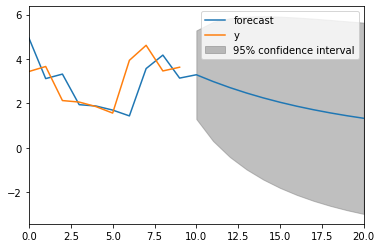

In [63]:
# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

Notice how, when $\phi$ is high like here, the forecast gradually moves to the long term mean of zero, but if $\phi$ were low, it would move much quicker to the long term mean. We try it out for $\phi = 0.3$.

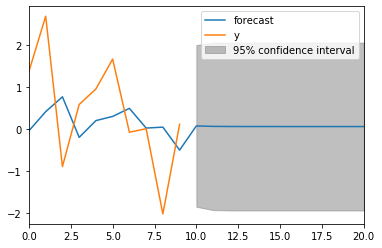

In [64]:
# True \phi = 0.3 and forecast moves to long term mean of 0 quicker than above.
mod = ARMA(simulated_data_3, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called `interest_rate_data`. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an $AR$ model attempts to quantify how much they are expected to rise.

In [65]:
# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2022')
plt.legend(fontsize=8)
plt.show()

NameError: name 'interest_rate_data' is not defined

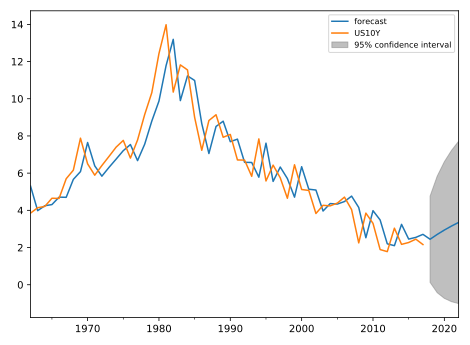

In [66]:
from IPython.core.display import SVG
SVG(filename='pics/pic05.svg')

According to an $AR(1)$ model, 10-year interest rates are forecasted to rise from $2.16\%$, towards the end of 2017 to $3.35\%$ in five years.

#### Comparing an AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

In [ ]:
# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

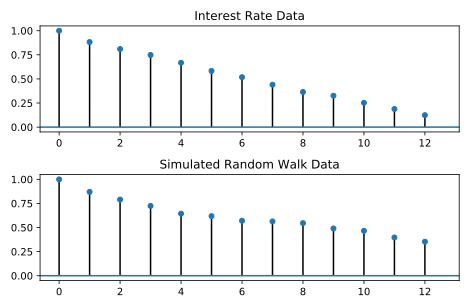

In [67]:
from IPython.core.display import SVG
SVG(filename='pics/pic06.svg')

Notice the Autocorrelation functions look very similar for the two series.

#### Identifying the order of an AR model

In practice, the order of an AR(p) model will usually not be known in advance. There are two techniques that will be helpful in determining the order of the model:
- Partial Autocorrelation Function
- Information Criteria

PACF measures the incremental benefit of adding another lag. Imagine running several regressions where you regress on more and more lag values.
$$
\begin{array}{rcl}
R_t & = & \phi_{0,1} + \phi_{1,1} R_{t-1} + \epsilon_t \\
R_t & = & \phi_{0,2} + \phi_{1,2} R_{t-1} + \phi_{2,2} R_{t-2} + \epsilon_t \\
R_t & = & \phi_{0,3} + \phi_{1,3} R_{t-1} + \phi_{2,3} R_{t-2} + \phi_{3,3} R_{t-3} + \epsilon_t\\
\end{array}
$$

`plot_pacf` is the `statsmodels` function for plotting the PACF in Python.

`from statsmodels.graphics.tsaplots import plot_pacf
 plot_pacf(df['col1'], lags=20, alpha=0.05)`
 
 The more the parameters in the model, the better it fits the data. But this leads to overfitting. Information Criteria adjusts the goodness-of-fit for number of parameters (by imposing a penalty). Two popular adjusted goodness-of-fit measures are:
 - Akaike Information Criterion (AIC), and
 - Bayesian Information Criterion (BIC).
 
 To get them, we can either see the full summary `result.summary()` after fitting the model or we can instead print them directly using `result.aic` and `result.bic`.
 
 The way to use BIC is to fit several models and choose the one with the lowest BIC.

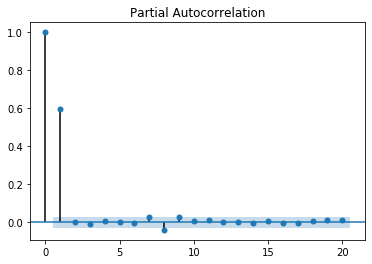

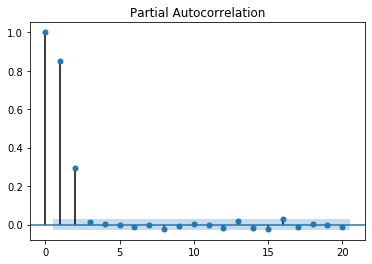

In [69]:
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -.6, -.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

You will notice that for an $AR(1)$, the PACF should have a significant lag-1 value, and roughly zeroes after that. And for an $AR(2)$, the sample PACF should have significant lag-1 and lag-2 values, and zeroes after that.

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the $AR(2)$ simulated data from the last exercise, saved as `simulated_data_2`, and compute the BIC as you vary the order, $p$, in an $AR(p)$ from $0$ to $6$.

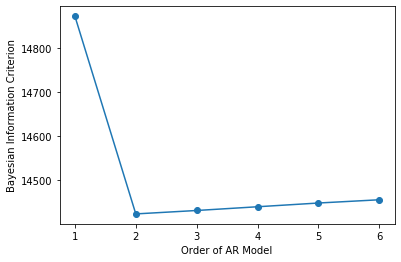

In [70]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

#### Moving Average (MA) model

$R_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$  
The above is an $MA(1)$ model, an $MA$ model of order 1 and $\theta$ is called the $MA$ parameter.

- If $\theta = 0$, then the process is white noise.
- $MA$ models are stationary for all values of $\theta$.

For example, if $R_t$ is a time series of stock returns with
$R_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$.

- If $\theta < 0$, then it is one-period mean reverting. (A positive shock $(\epsilon_{t-1})$ last period might lead to positive returns last period but this period's return is more likely to be negative. Shocks two periods back have no effect on today's return; the only effects are from shocks now and last period.)
- If $\theta > 0$, then it is one-period momentum.

Lag-one autocorrelation is $\dfrac{\theta}{1 + \theta^2}$.

Higher frequency stock returns are a nice example of a $MA(1)$ process. Since stock prices are not continuous but in one cent increments, the minute-by-minute prices often bounce back and forth over a one-cent range. This is sometimes referred to as the "bid-ask bouce". The bid-ask bounce induces a negative lag-one autocorrelation but no autocorrelation beyond lag-one.

$R_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2}$  
The above is an $MA(2)$ model.

$R_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3}$  
The above is an $MA(3)$ model.

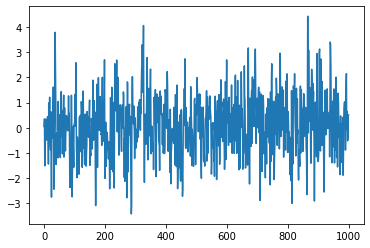

In [71]:
# Simulating an MA process

ar = np.array([1])
ma = np.array([1, 0.5]) # \theta = .5
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

#### Simulating an MA(1) Time Series

You will simulate and plot a few $MA(1)$ time series, each with a different parameter, $\theta$, using the `arima_process` module in `statsmodels`, just as you did in the last chapter for $AR(1)$ models. You will look at an $MA(1)$ model with a large positive $\theta$ and a large negative $\theta$.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on $AR$ models, the sign of the $MA$ coefficients is what we would expect. For example, for an $MA(1)$ process with $\theta=−0.9$, the array representing the MA parameters would be `ma = np.array([1, -0.9])`

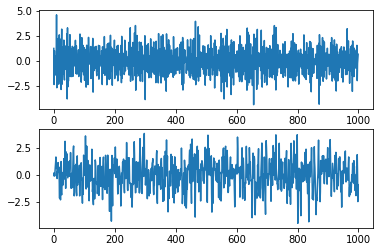

In [72]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, .9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

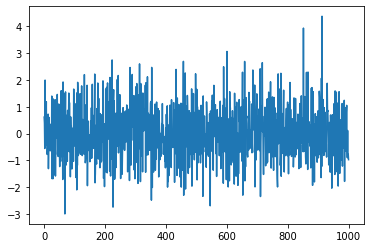

In [77]:
ar3 = np.array([1])
ma3 = np.array([1, -.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

Unlike an $AR(1)$, an $MA(1)$ model has no autocorrelation beyond lag 1, an $MA(2)$ model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an $MA(1)$ model is not $\theta$, but rather $\dfrac{\theta}{1 + \theta^2}$. For example, if the $MA$ parameter, $\theta$, is equal to $+0.9$, the first-lag autocorrelation will be $\dfrac{0.9}{1 + 0.9^2}=0.497$, and the autocorrelation at all other lags will be zero. If the $MA$ parameter, $\theta$, is $-0.9$, the first-lag autocorrelation will be $\dfrac{−0.9}{1 +(−0.9)^2} = −0.497$.

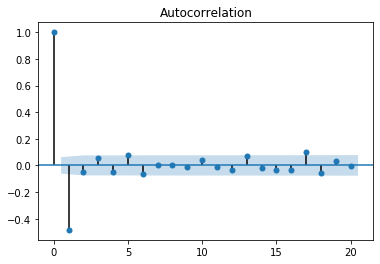

In [73]:
# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

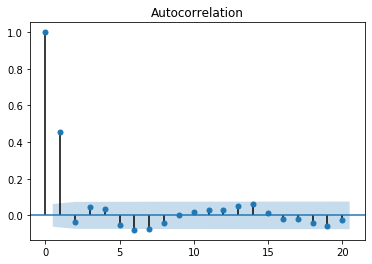

In [74]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

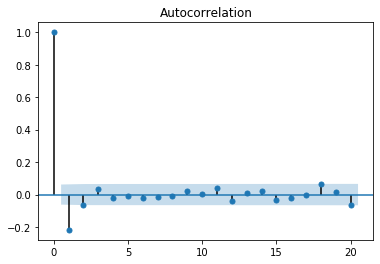

In [78]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

In [81]:
mod = ARMA(simulated_data, order=(0,1))
result = mod.fit()

In [82]:
result.params # true \theta=0.5

array([0.08952142, 0.55637399])

In [83]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1422.131
Method:                       css-mle   S.D. of innovations              1.003
Date:                Sun, 01 Nov 2020   AIC                           2850.261
Time:                        01:02:15   BIC                           2864.984
Sample:                             0   HQIC                          2855.857
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0895      0.049      1.814      0.070      -0.007       0.186
ma.L1.y        0.5564      0.026     21.257      0.000       0.505       0.608
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.7974           +0.0000j            1.7974            0.5000
-----------------------------------------------------------------------------
"""

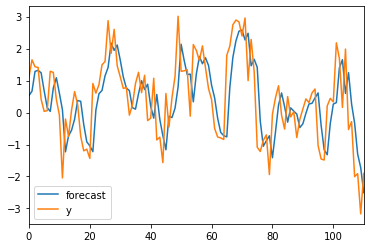

In [86]:
res.plot_predict(start=990, end=1100) # start='2016-07-01', end='2017-06-01'
plt.show()

In an $MA$ model, unlike an $AR$ model, all forecasts beyond the one-step ahead forecast will be the same.

In [87]:
# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1405.561
Method:                       css-mle   S.D. of innovations              0.986
Date:                Sun, 01 Nov 2020   AIC                           2817.121
Time:                        01:09:00   BIC                           2831.845
Sample:                             0   HQIC                          2822.717
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.003     -0.802      0.423      -0.008       0.003
ma.L1.y       -0.9108      0.012    -74.368      0.000      -0.935      -0.887
                                    Roots           

For the simulated series simulated_data_1 with θ=−0.9, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

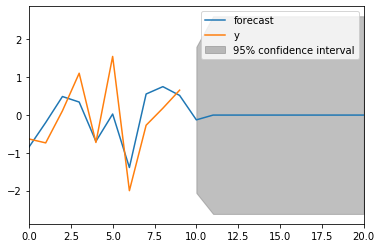

In [88]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

#### ARMA Model

$ARMA(1,1)$ Model: $R_t = \mu + \phi R_{t-1} + \epsilon_t + \theta \epsilon_{t-1}$

ARMA models can be converted to pure $AR$ or pure $MA$ models.

**Converting $AR(1)$ into an $MA(\infty)$**

$$
\begin{array}{rcl}
R_t & = & \mu + \phi R_{t-1} + \epsilon_t \\
R_t & = & \mu + \phi ( \mu + \phi R_{t-2} + \epsilon_{t-1}) + \epsilon_t \ (\rm{substituting}\ R_{t-1}) \\
    & \vdots & \\
R_t & = & \mu / (1 - \phi) + \epsilon_t + \phi \epsilon_{t-1} - \phi^2 \epsilon_{t-2} + \phi^3 \epsilon_{t-3} + \ldots
\end{array}
$$

Notice that the MA parameters are $\phi, \phi^2,$ etc.

????

#### High Frequency Stock Prices

Higher frequency stock data is well modeled by an $MA(1)$ process, so it's a nice application of the models in this chapter.

The DataFrame `intraday` contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the `DATE` column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

The source of the minute data is Google Finance (see [here](https://www.quantshare.com/sa-426-6-ways-to-download-free-intraday-and-tick-data-for-the-us-stock-market) on how the data was downloaded).

In [101]:
intraday = pd.read_csv('data/Sprint_Intraday.txt', header=None)
intraday.drop([2,3,4,5], axis=1, inplace=True)

In [103]:
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [104]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


In [105]:
intraday.head()

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


#### Cleaning the data

When you print out the length of the DataFrame `intraday`, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

In [106]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


In [107]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


In [108]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

In [109]:
intraday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 1 columns):
CLOSE    391 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


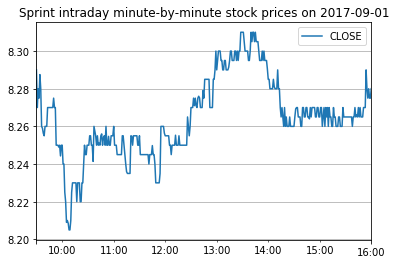

In [110]:
# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.title('Sprint intraday minute-by-minute stock prices on 2017-09-01')
plt.show()

#### Applying an $MA$ Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an $MA(1)$ model. Therefore, you will fit an $MA(1)$ model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an $MA(1)$ process. Then, fit the data to an $MA(1)$, the same way you did for simulated data.

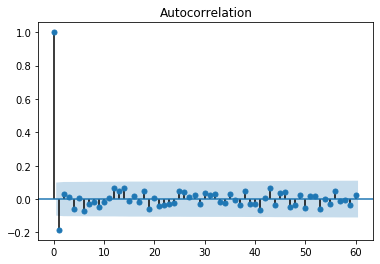

const         -0.000002
ma.L1.CLOSE   -0.179273
dtype: float64


In [111]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

Notice the significant negative lag-1 autocorrelation, just like for an $MA(1)$ model.

#### Equivalence of $AR(1)$ and $MA(\infty)$

To better understand the relationship between $MA$ models and $AR$ models, you will demonstrate that an $AR(1)$ model is equivalent to an $MA(\infty)$ model with the appropriate parameters.

You will simulate an $MA$ model with parameters $0.8, 0.8^2, 0.8^3,\ldots$ for a large number $(30)$ lags and show that it has the same Autocorrelation Function as an $AR(1)$ model with $\phi = 0.8$.

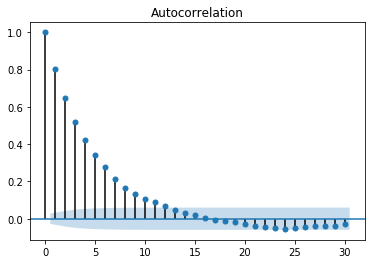

In [112]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [.8 ** i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

Notice that the ACF looks the same as an AR(1) with parameter 0.8

In [113]:
mod = ARMA(simulated_data, order=(1,0))
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(1, 0)   Log Likelihood               -7085.973
Method:                       css-mle   S.D. of innovations              0.998
Date:                Sun, 01 Nov 2020   AIC                          14177.947
Time:                        13:52:43   BIC                          14197.498
Sample:                             0   HQIC                         14184.799
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0225      0.072     -0.315      0.753      -0.163       0.118
ar.L1.y        0.8029      0.008     95.260      0.000       0.786       0.819
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2455           +0.0000j            1.2455            0.0000
-----------------------------------------------------------------------------
"""

#### Cointegration Models

Suppose two time series $P_t$ and $Q_t$ are random walks and hence not forecastable.

It is possible though that a linear combination $P_t - c Q_t$ is not a random walk, and hence forecastable. We then say that $P_t$ and $Q_t$ are cointegrated.

E.g., Dog on a leash. $P_t =$ position of owner, $Q_t =$ position of dog, $P_t - Q_t =$ distance between them, which is mean reverting (length of the leash).

E.g., $P_t =$ heating oil price, $Q_t =$ natural gas price, $P_t - Q_t =$ difference in their price.

Types of series which are cointegrated:
- Economic Substitutes: E.g., heating oil and natural gas; platinum and palladium, corn and wheat, corn and sweetener, bitcoin and ethereum).
- Competitors: E.g., Coke and Pepsi. Apple and Blackberry is an example of when a dog broke the leash and ran away from the owner.

#### Two Steps to Test for Cointegration

1. Regress $P_t$ on $Q_t$ and get slope $c$.
2. Run Augmented Dickey-Fuller test on $P_t - c Q_t$ to test for random walk.

Alternatively, use `coint` function in `statsmodels` that combines both steps.

In [116]:
from statsmodels.tsa.stattools import coint
coint(P, Q)

In [124]:
HO = pd.read_csv('data/CME_HO1.csv', parse_dates=['Date'], index_col='Date')
HO = HO.sort_index(ascending=True)
HO.head()

,Close
Date,
1991-01-02,0.7330
1991-01-03,0.7024
1991-01-04,0.6830
1991-01-07,0.7617
1991-01-08,0.7430


In [125]:
NG = pd.read_csv('data/CME_NG1.csv', parse_dates=['Date'], index_col='Date')
NG = NG.sort_index(ascending=True)
NG.head()

,Close
Date,
1991-01-02,1.832
1991-01-03,1.782
1991-01-04,1.743
1991-01-07,1.785
1991-01-08,1.786


The Heating Oil and Natural Gas prices are loaded in DataFrames `HO` and `NG`. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in \\$/gallon, by 7.25, which converts it to \\$/millionBTU, which is the same units as Natural Gas).

The data for continuous futures (each contract has to be spliced together in a continuous series as contracts expire) was obtained from [Quandl](https://blog.quandl.com/api-for-futures-data).

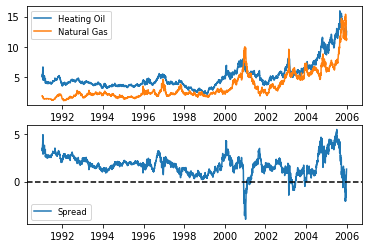

In [126]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

Notice from the plot that when Heating Oil briefly dipped below Natural Gas, it quickly reverted back up.

To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames `HO` and `NG`.

In [127]:
# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.9567108785017862
The p-value for the ADF test on NG is  0.9008747444676732
The p-value for the ADF test on the spread is  7.019439302142287e-05


As we expected, we cannot reject the hypothesis that the individual futures are random walks, but we can reject that the spread is a random walk.

#### Are Bitcoin and Ethereum Cointegrated?

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression. In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was $(1,−1)$. In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (`BTC`), on another cryptocurrency, ethereum (`ETH`). If we call the regression coefficient $b$, then the cointegration vector is simply $(1,−b)$. Then perform the ADF test on `BTC` − b `ETH`. Bitcoin and Ethereum prices are pre-loaded in DataFrames `BTC` and `ETH`.

In [ ]:
# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC, ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

    output:
    The p-value for the ADF test is  0.023369002323472707

The data suggests that Bitcoin and Ethereum are cointegrated.

In [ ]:
print(adf_stats)

    output:
    (-3.145426772889842, 0.023369002323472707, 20, 711, {'1%': -3.439580754053961, '5%': -2.865613606467485, '10%': -2.568939269723711}, 8107.359441380021)

In [131]:
temp_NY = pd.read_csv('NOAA_TAVG.csv', index_col='DATE')
temp_NY.head()

,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.9
1874,51.3


#### Is Temperature a Random Walk (with Drift)?

An $ARMA$ model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.

The DataFrame `temp_NY` contains the average annual temperature in Central Park, NY from 1870-2016 (the data was downloaded from the NOAA [here](https://www.ncdc.noaa.gov/cdo-web/search)). Plot the data and test whether it follows a random walk (with drift).

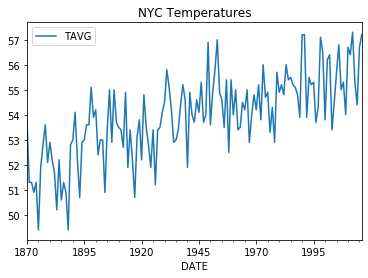

The p-value for the ADF test is  0.583293898787111


In [132]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.title('NYC Temperatures')
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

The data seems to follow a random walk with drift.

#### Getting "Warmed" Up: Look at Autocorrelations

Since the temperature series, `temp_NY`, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

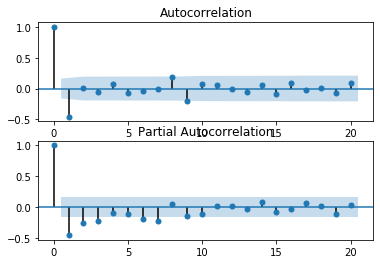

In [133]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

#### Which ARMA Model is Best?

Recall that the Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. Lower AIC scores are better.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.

The annual change in temperature is in a DataFrame `chg_temp`.

In [134]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1, 1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

/home/shuvra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/shuvra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/shuvra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.5346898313909
The AIC for an AR(2) is:  501.9274123160227
The AIC for an ARMA(1,1) is:  469.07291045296836


The ARMA(1,1) has the lowest AIC values among the three models.

#### Don't Throw Out That Winter Coat Yet

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

The data is preloaded in a DataFrame called `temp_NY`.

/home/shuvra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/shuvra/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


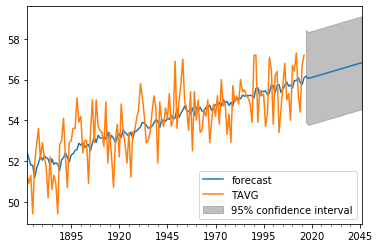

In [135]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

According to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.

Advanced Topics:

- GARCH Models
- Nonlinear Models
- Multivariate Time Series Models
- Regime Switching Models
- State Space Models and Kalman Filtering